# Machine Failure Prediction Model Based On DataSet

## About Dataset :-

## Dataset Overview :-
This dataset contains sensor data collected from various machines, with the aim of predicting machine failures in advance. It includes a variety of sensor readings as well as the recorded machine failures.

 ## Columns Description  :-
- #####  footfall: The number of people or objects passing by the machine.
- #####  tempMode: The temperature mode or setting of the machine.
- #####  AQ: Air quality index near the machine.
- #####  USS: Ultrasonic sensor data, indicating proximity measurements.
- #####  CS: Current sensor readings, indicating the electrical current usage of the machine.
- #####  VOC: Volatile organic compounds level detected near the machine.
- #####  RP: Rotational position or RPM (revolutions per minute) of the machine parts.
- #####  IP: Input pressure to the machine.
- #####  Temperature: The operating temperature of the machine.
- ##### fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, auc

In [6]:
# Suppress warnings to avoid cluttering the output
warnings.filterwarnings('ignore')

In [7]:
# Loading the Dataset
data = pd.read_csv('MachineFailure.csv')

In [8]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0


In [9]:
# Displaying the last few rows of the dataset
print("\nLast few rows of the dataset:")
print(data.tail())


Last few rows of the dataset:
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
939         0         7   7    1   6    4  73   6           24     1
940         0         7   5    2   6    6  50   6           24     1
941         0         3   6    2   7    5  43   6           24     1
942         0         6   6    2   5    6  46   7           24     1
943        18         7   4    2   6    3  61   7           24     1


# Data Preprocessing :-

In [11]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [12]:
# Handling missing values by filling them with the mean of their respective columns
data = data.fillna(data.mean())

In [13]:
# Displaying a summary of the dataset
print("\nSummary of the dataset:")
print(data.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
None


In [14]:
# Splitting the data into features and target variable
X = data.drop(columns=['fail'])  # Features
y = data['fail']  # Target variable

In [15]:
# Splitting the data into training (70%) and testing (30%) sets, while preserving indices
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X, y, data.index, test_size=0.3, random_state=42
)

In [16]:
# Normalizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Data Analysis(EDA) :- 

In [18]:
# Displaying statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(data.describe())


Statistical summary of numerical columns:
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.00

<Figure size 1200x1000 with 0 Axes>

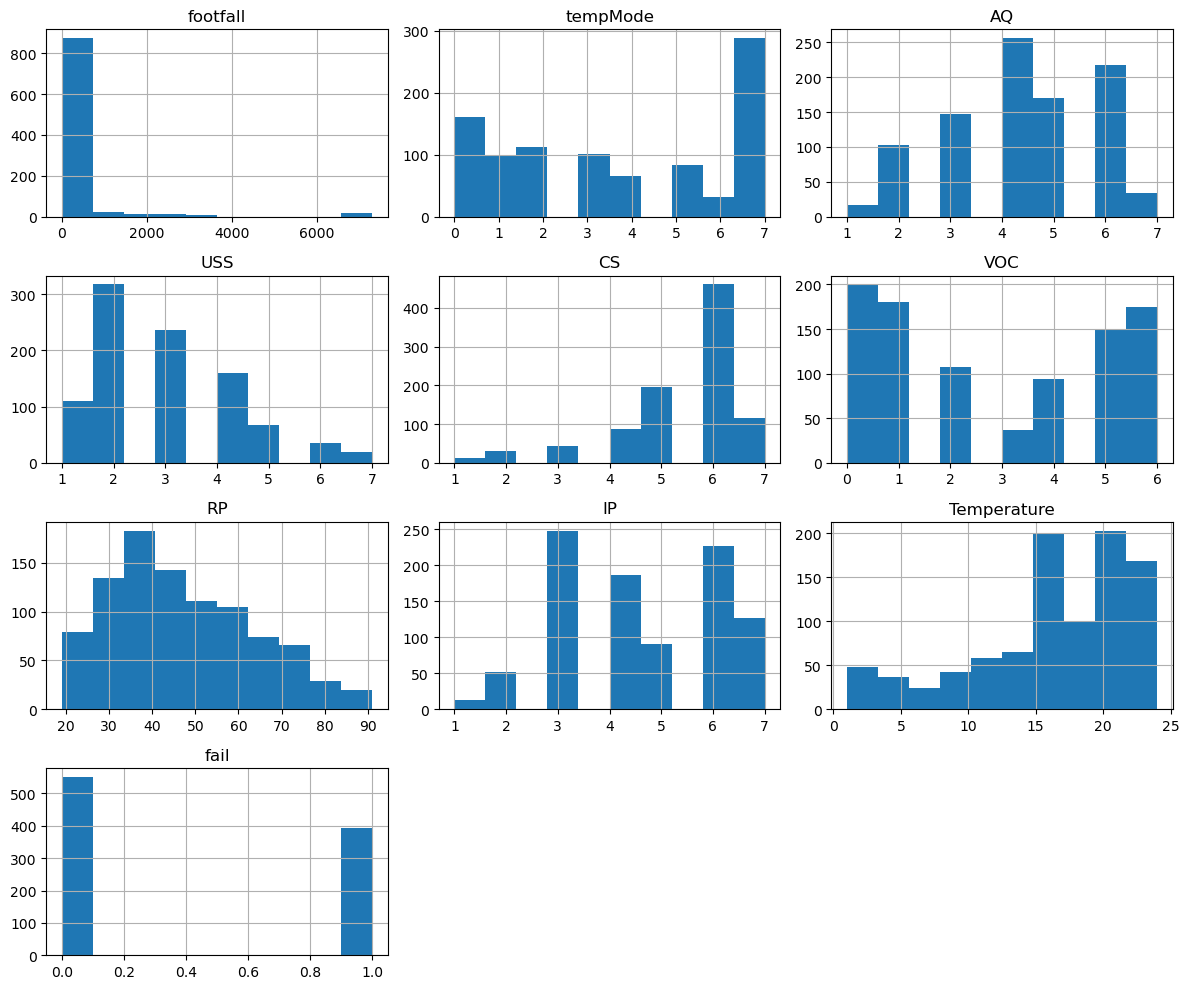

In [19]:
# Plotting histograms to show distribution of data
plt.figure(figsize=(12, 10))
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


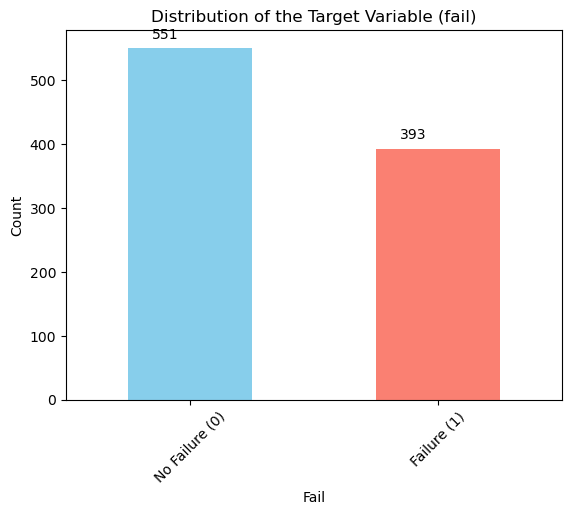

In [20]:
# Plotting barplot to show failure and no failure
bar=data['fail'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of the Target Variable (fail)')
plt.xlabel('Fail')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Failure (0)', 'Failure (1)'], rotation=45)
for bar in bar.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 10, 
             f'{int(bar.get_height())}', ha='center', va='bottom')
plt.show()

Number of Machines having No Failure :  551
Number of Machines having Failure :  393


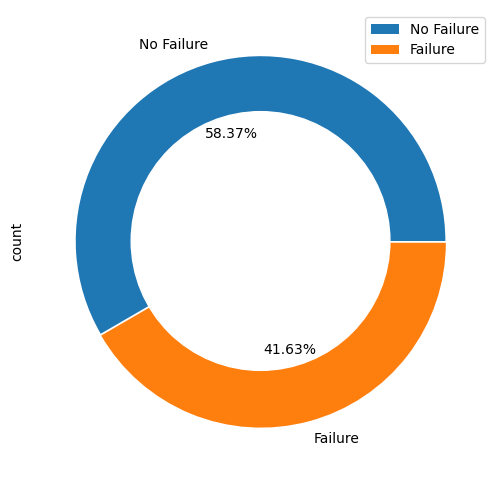

In [21]:
# Plotting circle to show failure and no failure in %
print("Number of Machines having No Failure : ",data['fail'].value_counts()[0])
print("Number of Machines having Failure : ",data['fail'].value_counts()[1])

plt.figure(figsize=(6,6))
data['fail'].value_counts().plot.pie(labels=['No Failure','Failure'], explode=(0,0.01),autopct='%1.2f%%')
circle = plt.Circle( (0,0), 0.7,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

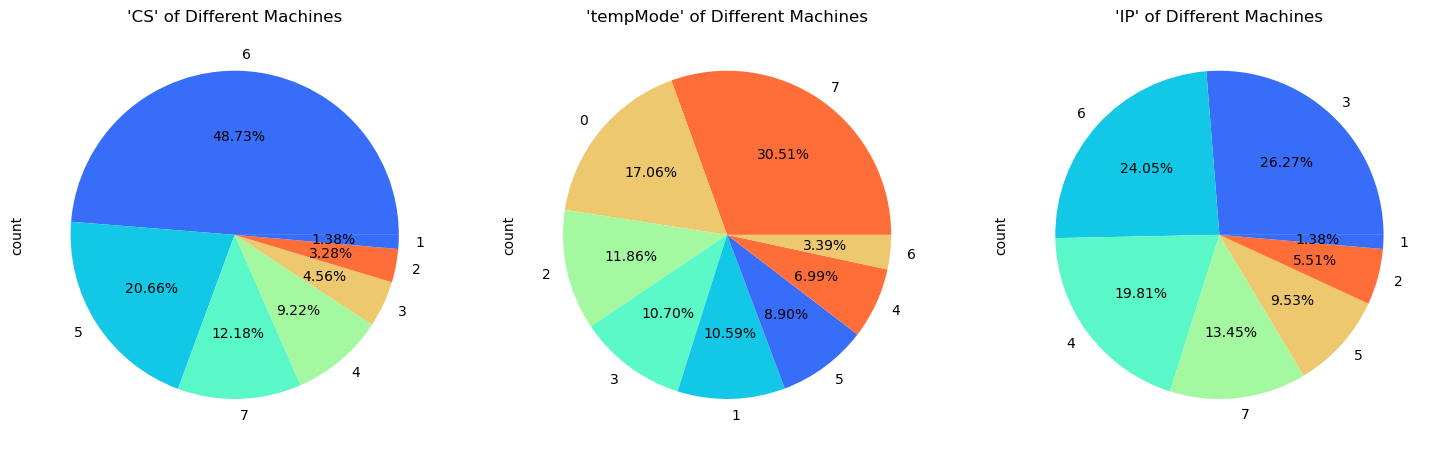

In [22]:
# plotting piechart of different parameter of dataset
plt.figure(figsize=(18,6))

plt.subplot(1,3,2)
myexplode=[0, 0.05, 0.075]
data['tempMode'].value_counts().plot.pie(autopct='%1.2f%%', colors=sns.color_palette('rainbow_r')) 
plt.title("'tempMode' of Different Machines")

plt.subplot(1,3,1)
myexplode=[0, 0.025, 0.05, 0.075]
data['CS'].value_counts().plot.pie(autopct='%1.2f%%', colors=sns.color_palette('rainbow'))
plt.title("'CS' of Different Machines")

plt.subplot(1,3,3) 
data[ 'IP'].value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('rainbow')) 
plt.title("'IP' of Different Machines")

plt.show()

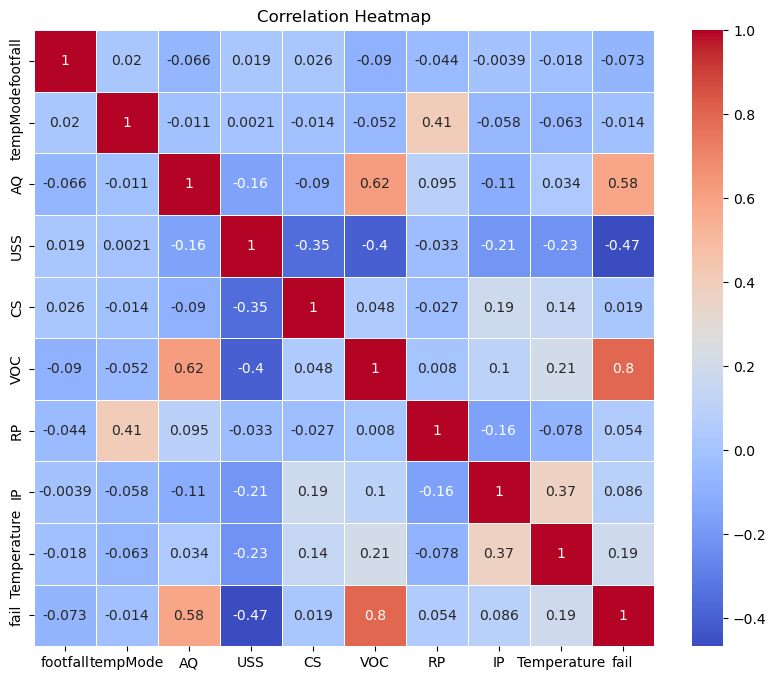

In [23]:
# Calculating and plotting the correlation matrix
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- fail has high positive correlation with AQ (0.58) and VOC (0.80)

- fail has a significant negative correlation with USS (-0.47)

- VOC and AQ are positively correlated (0.62)

- Temperature and fail also have a moderate positive correlation (0.190)

# Model Training and Evaluation :-

In [26]:
# Define and compile a more complex neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
# Training the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5132 - loss: 0.6937 - val_accuracy: 0.8099 - val_loss: 0.5417
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8424 - loss: 0.4728 - val_accuracy: 0.8627 - val_loss: 0.3608
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9122 - loss: 0.3112 - val_accuracy: 0.8873 - val_loss: 0.2888
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9179 - loss: 0.2405 - val_accuracy: 0.8944 - val_loss: 0.2912
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9220 - loss: 0.1850 - val_accuracy: 0.8873 - val_loss: 0.3102
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9219 - loss: 0.2060 - val_accuracy: 0.8838 - val_loss: 0.3040
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9219 - loss: 0.2003 - val_accuracy: 0.8838 - val_loss: 0.3010
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8989 - loss: 0.2516 - val_accuracy: 0.8803 - val_loss

In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8911 - loss: 0.2712 
Test loss: 0.2887983024120331
Test accuracy: 0.8873239159584045


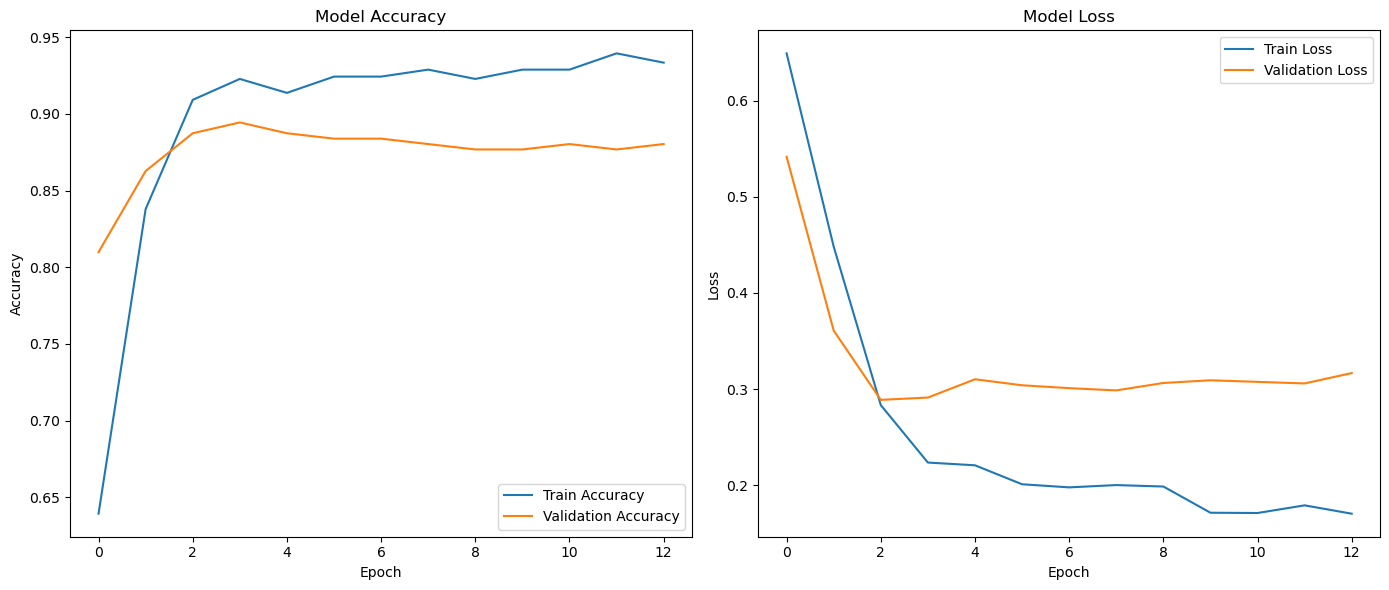

In [29]:
# Plotting training and validation accuracy and loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# Evaluating Models 
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    return results


In [31]:
# Types of Model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

In [32]:
# Dictionary to store results for each model
results = {}

In [33]:
# Results of each Model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Find the best model based on ROC-AUC score
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = models[best_model_name]
best_model_results = results[best_model_name]

print("\nBest Model:")
print(f"{best_model_name} with Accuracy: {best_model_results['Accuracy']:.4f}")
print(f"Accuracy: {best_model_results['Accuracy']:.4f}")
print(f"Precision: {best_model_results['Precision']:.4f}")
print(f"Recall: {best_model_results['Recall']:.4f}")
print(f"F1 Score: {best_model_results['F1 Score']:.4f}")


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...

Best Model:
Logistic Regression with Accuracy: 0.8838
Accuracy: 0.8838
Precision: 0.8527
Recall: 0.8871
F1 Score: 0.8696


In [34]:
# Printing The results
print("\nAll Model Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        if isinstance(value, (list, np.ndarray)):
            print(f"{metric}: [Array with length {len(value)}]")
        else:
            print(f"{metric}: {value:.4f}")


All Model Results:

Logistic Regression:
Accuracy: 0.8838
Precision: 0.8527
Recall: 0.8871
F1 Score: 0.8696

Decision Tree:
Accuracy: 0.8345
Precision: 0.8080
Recall: 0.8145
F1 Score: 0.8112

Random Forest:
Accuracy: 0.8838
Precision: 0.8640
Recall: 0.8710
F1 Score: 0.8675


# Prediction :-

In [36]:
# Predicting machine failure using the best model
y_pred_best_model = best_model.predict(X_test)
y_prob_best_model = best_model.predict_proba(X_test)[:, 1]

# Displaying predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best_model,
})

In [37]:
# Selecting random indexes
random_indexes = np.random.choice(predictions_df.index, size=10, replace=False) 

# Creating a DataFrame for the selected indexes
selected_predictions_df = predictions_df.loc[random_indexes]

# Calculating the accuracy of predictions for the selected indexes
correct_predictions = selected_predictions_df['Actual'] == selected_predictions_df['Predicted']
accuracy_percentage = correct_predictions.mean() * 100


In [38]:
# Displaying the predictions and the accuracy percentage
print("\nPredictions using the best model for randomly selected indexes:")
print(selected_predictions_df)
print(f"\nPrediction Accuracy for the Above indexes is : {accuracy_percentage:.2f}%")
print(f"\nThis State That Our Model is Predicting Machine Failure or Not Machine Failure {accuracy_percentage:.2f}% accurately on random selected indexes")


Predictions using the best model for randomly selected indexes:
     Actual  Predicted
613       0          1
448       0          0
781       0          0
695       0          0
847       1          1
635       0          0
523       1          1
532       1          1
342       0          0
551       1          0

Prediction Accuracy for the Above indexes is : 80.00%

This State That Our Model is Predicting Machine Failure or Not Machine Failure 80.00% accurately on random selected indexes


In [39]:
import pickle

# Save the model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)